# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
dataframes = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]

In [6]:
for idx, df in enumerate(dataframes, 1):
    print(f"\nExplore DataFrame {idx}:")
    print("1. Shape:", df.shape)
    print("\n2. Number of Rows and Columns:")
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    print("\n3. Column Names:", df.columns)
    print("\n4. NaN Values:\n", df.isna().any())
    print("\n5. Duplicate Values:", df.duplicated().any())


Explore DataFrame 1:
1. Shape: (29322, 3)

2. Number of Rows and Columns:
29322 rows and 3 columns

3. Column Names: Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

4. NaN Values:
 Geographic Area    False
City               False
Median Income       True
dtype: bool

5. Duplicate Values: False

Explore DataFrame 2:
1. Shape: (29329, 3)

2. Number of Rows and Columns:
29329 rows and 3 columns

3. Column Names: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

4. NaN Values:
 Geographic Area    False
City               False
poverty_rate       False
dtype: bool

5. Duplicate Values: False

Explore DataFrame 3:
1. Shape: (29329, 3)

2. Number of Rows and Columns:
29329 rows and 3 columns

3. Column Names: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

4. NaN Values:
 Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

5. Duplicate Values: False

Explore DataFrame 4:
1. 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [7]:
def clean_data(df):
    # Substitute NaN values with 0
    df.fillna(0, inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

In [8]:
clean_data(df_hh_income)
clean_data(df_pct_poverty)
clean_data(df_pct_completed_hs)
clean_data(df_share_race_city)
clean_data(df_fatalities)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [9]:
fig = px.bar(df_pct_poverty, x='Geographic Area', y='poverty_rate',
             title='Poverty Rate by U.S. State',
             labels={'poverty_rate': 'Poverty Rate'},
             height=600,
             hover_data=['poverty_rate'],
             color='poverty_rate',  # Color bars based on the poverty rate
             color_continuous_scale='viridis',  # Adjust the color scale as needed
             )

# Sort the bars by poverty rate from highest to lowest
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [10]:
fig_hs_graduation = px.bar(df_pct_completed_hs, x='Geographic Area', y='percent_completed_hs',
                           title='High School Graduation Rate by U.S. State',
                           labels={'percent_completed_hs': 'High School Graduation Rate'},
                           height=600,
                           hover_data=['percent_completed_hs'],
                           color='percent_completed_hs',  # Color bars based on the graduation rate
                           color_continuous_scale='viridis',  # Adjust the color scale as needed
                           )

# Sort the bars by graduation rate from lowest to highest
fig_hs_graduation.update_layout(xaxis={'categoryorder': 'total ascending'})

# Show the plot
fig_hs_graduation.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [11]:
fig = px.line(df_pct_poverty, x='Geographic Area', y='poverty_rate', labels={'poverty_rate': 'Poverty Rate'},
              title='Relationship between Poverty Rates and High School Graduation Rates',
              height=600)

# Add a second y-axis for high school graduation rates
fig.add_trace(px.line(df_pct_completed_hs, x='Geographic Area', y='percent_completed_hs',
                      labels={'percent_completed_hs': 'High School Graduation Rate'}).data[0])

# Update layout to add a second y-axis
fig.update_layout(yaxis2=dict(overlaying='y', side='right'), legend_orientation='h')

# Show the plot
fig.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [13]:
merged_df = pd.merge(df_pct_poverty, df_pct_completed_hs, on='Geographic Area')
merged_df_sample = merged_df.sample(frac=0.01)

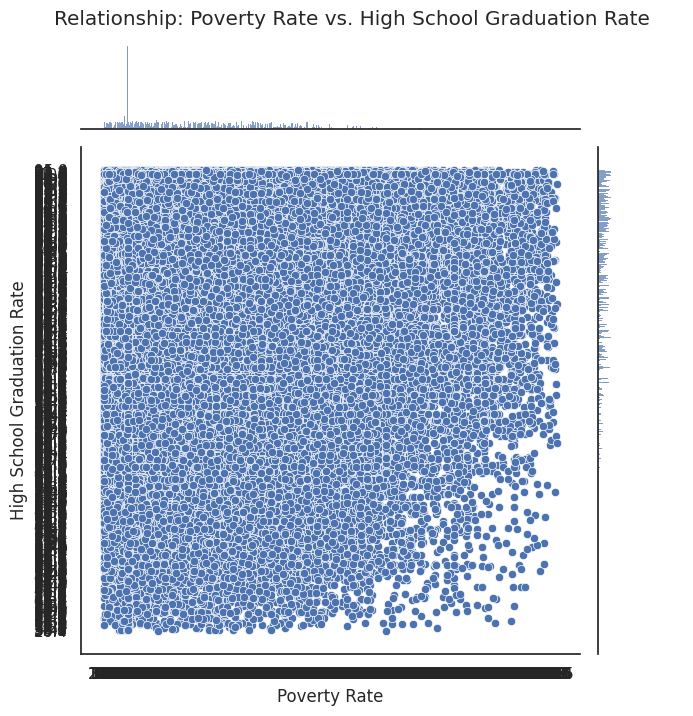

In [14]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged_df_sample, kind="scatter", height=7)

plt.xlabel('Poverty Rate')
plt.ylabel('High School Graduation Rate')
plt.suptitle('Relationship: Poverty Rate vs. High School Graduation Rate', y=1.02)

# Show the plot
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

In [15]:
merged_df_sample = merged_df.sample(frac=0.01)

# Clean the data by replacing non-numeric values with NaN and dropping those rows
merged_df_sample['poverty_rate'] = pd.to_numeric(merged_df_sample['poverty_rate'], errors='coerce')
merged_df_sample['percent_completed_hs'] = pd.to_numeric(merged_df_sample['percent_completed_hs'], errors='coerce')

In [16]:
merged_df_sample.dropna(subset=['poverty_rate', 'percent_completed_hs'], inplace=True)


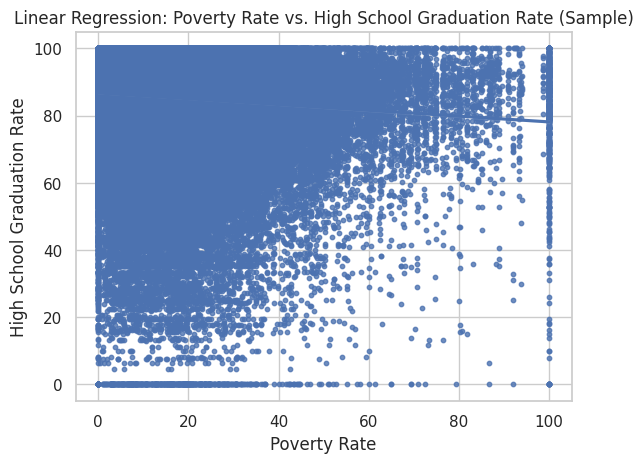

In [17]:
sns.set(style="whitegrid")
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged_df_sample, scatter_kws={'s': 10})

# Set plot labels and title
plt.xlabel('Poverty Rate')
plt.ylabel('High School Graduation Rate')
plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate (Sample)')

# Show the plot
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [22]:
df_share_race_sample = df_share_race_city.sample(frac=0.1)

# Melt the DataFrame to reshape it for the bar chart
df_melted = pd.melt(df_share_race_sample, id_vars=['Geographic area'], value_vars=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'])

In [23]:
fig = px.bar(df_melted,
             x='Geographic area',
             y='value',
             color='variable',  # Color bars by race
             labels={'value': 'Percentage'},
             title='Racial Makeup of Each U.S. State',
             barmode='stack',  # Stack bars to show the total percentage for each state
             height=600)

# Set legend title
fig.update_layout(legend_title_text='Race')

# Show the plot
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [24]:
race_counts = df_fatalities['race'].value_counts()

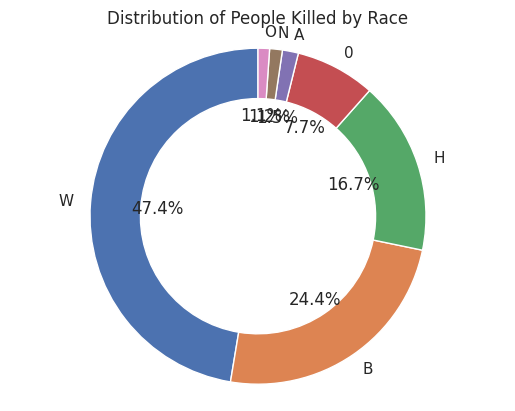

In [25]:
fig, ax = plt.subplots()
ax.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal for a circular donut chart
ax.axis('equal')

# Set title
plt.title('Distribution of People Killed by Race')

# Show the plot
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [26]:
gender_counts = df_fatalities['gender'].value_counts()

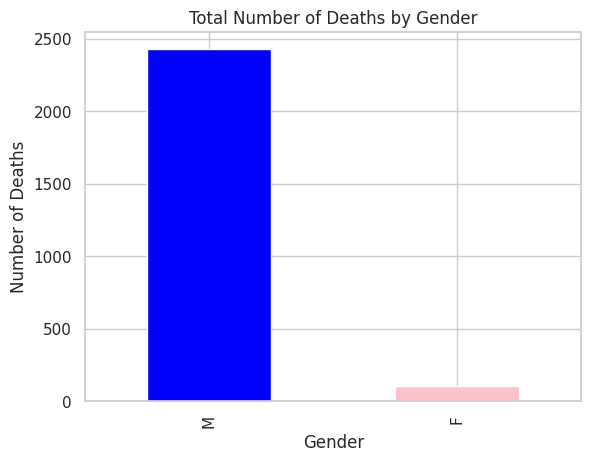

In [27]:
fig, ax = plt.subplots()
gender_counts.plot(kind='bar', color=['blue', 'pink'], ax=ax)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Deaths')
plt.title('Total Number of Deaths by Gender')

# Show the plot
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [28]:
df_fatalities_sample = df_fatalities.sample(frac=0.1)

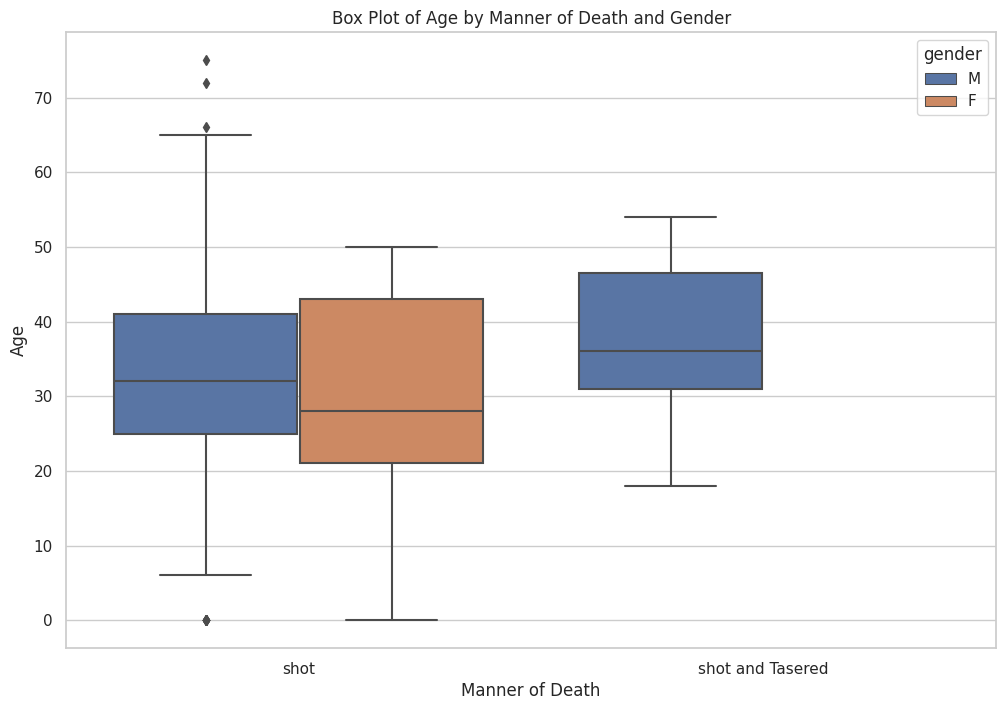

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities_sample)

# Set labels and title
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.title('Box Plot of Age by Manner of Death and Gender')

# Show the plot
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [30]:
armed_percentage = df_fatalities['armed'].value_counts(normalize=True) * 100

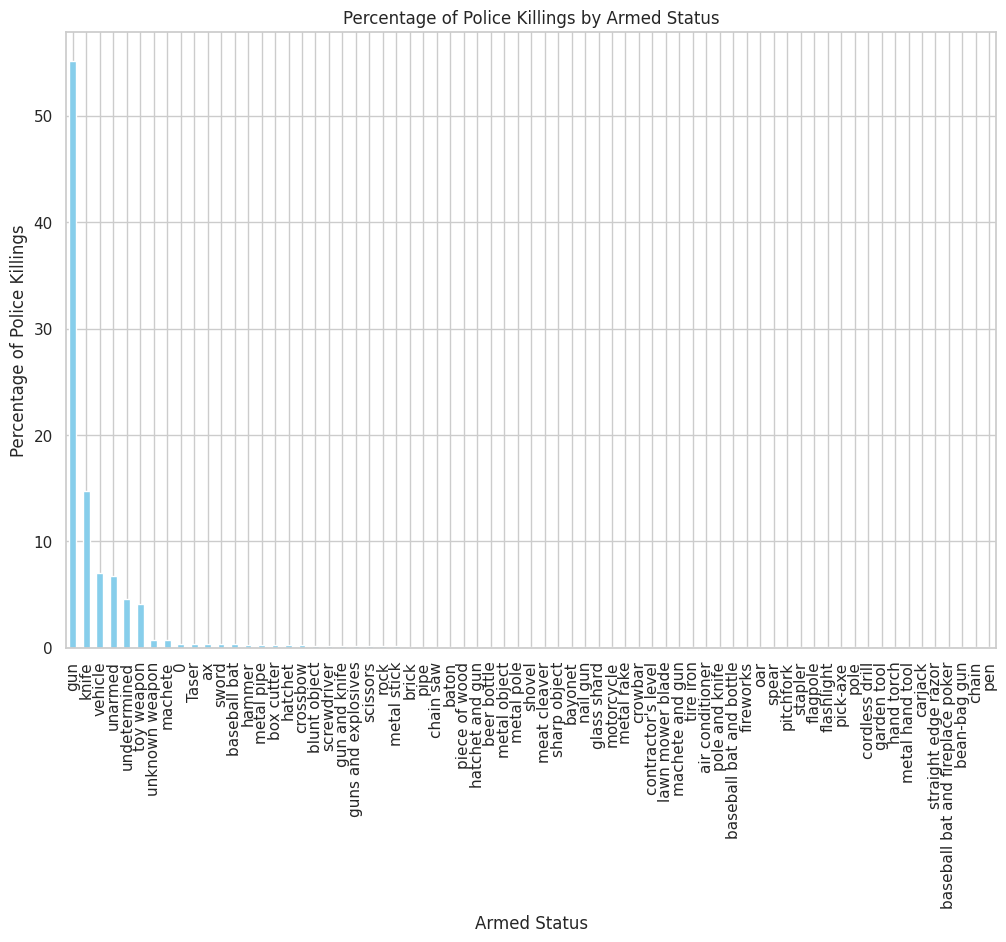

In [31]:
plt.figure(figsize=(12, 8))
armed_percentage.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Armed Status')
plt.ylabel('Percentage of Police Killings')
plt.title('Percentage of Police Killings by Armed Status')

# Show the plot
plt.show()

In [32]:
weapon_counts = df_fatalities['armed'].value_counts()

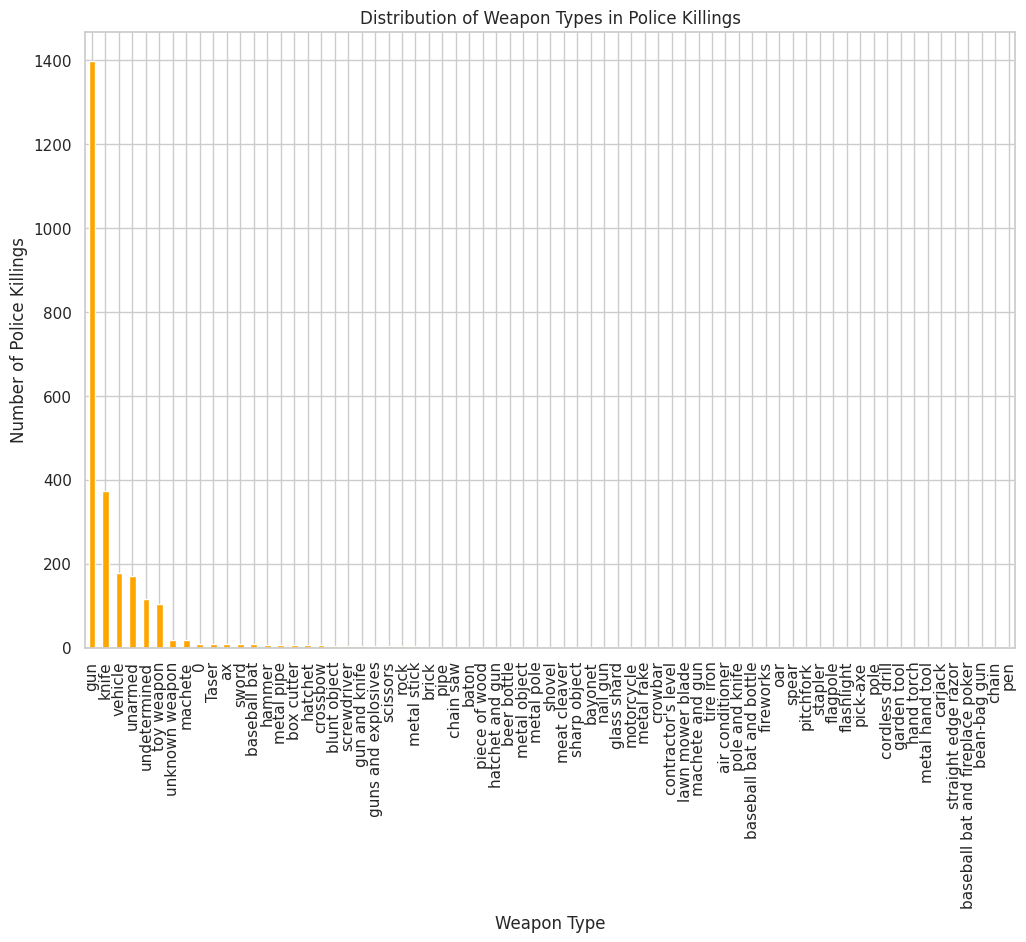

In [33]:
# Create a bar chart
plt.figure(figsize=(12, 8))
weapon_counts.plot(kind='bar', color='orange')

# Set labels and title
plt.xlabel('Weapon Type')
plt.ylabel('Number of Police Killings')
plt.title('Distribution of Weapon Types in Police Killings')

# Show the plot
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [34]:
under_25_percentage = (df_fatalities['age'] < 25).sum() / len(df_fatalities) * 100

# Print the percentage
print(f"Percentage of people killed under 25 years old: {under_25_percentage:.2f}%")

Percentage of people killed under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

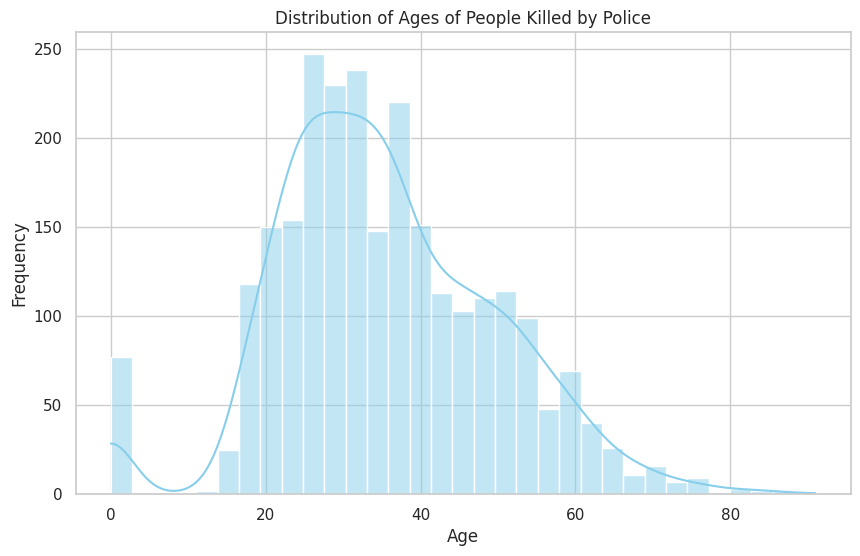

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df_fatalities['age'], kde=True, color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of People Killed by Police')

# Show the plot
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

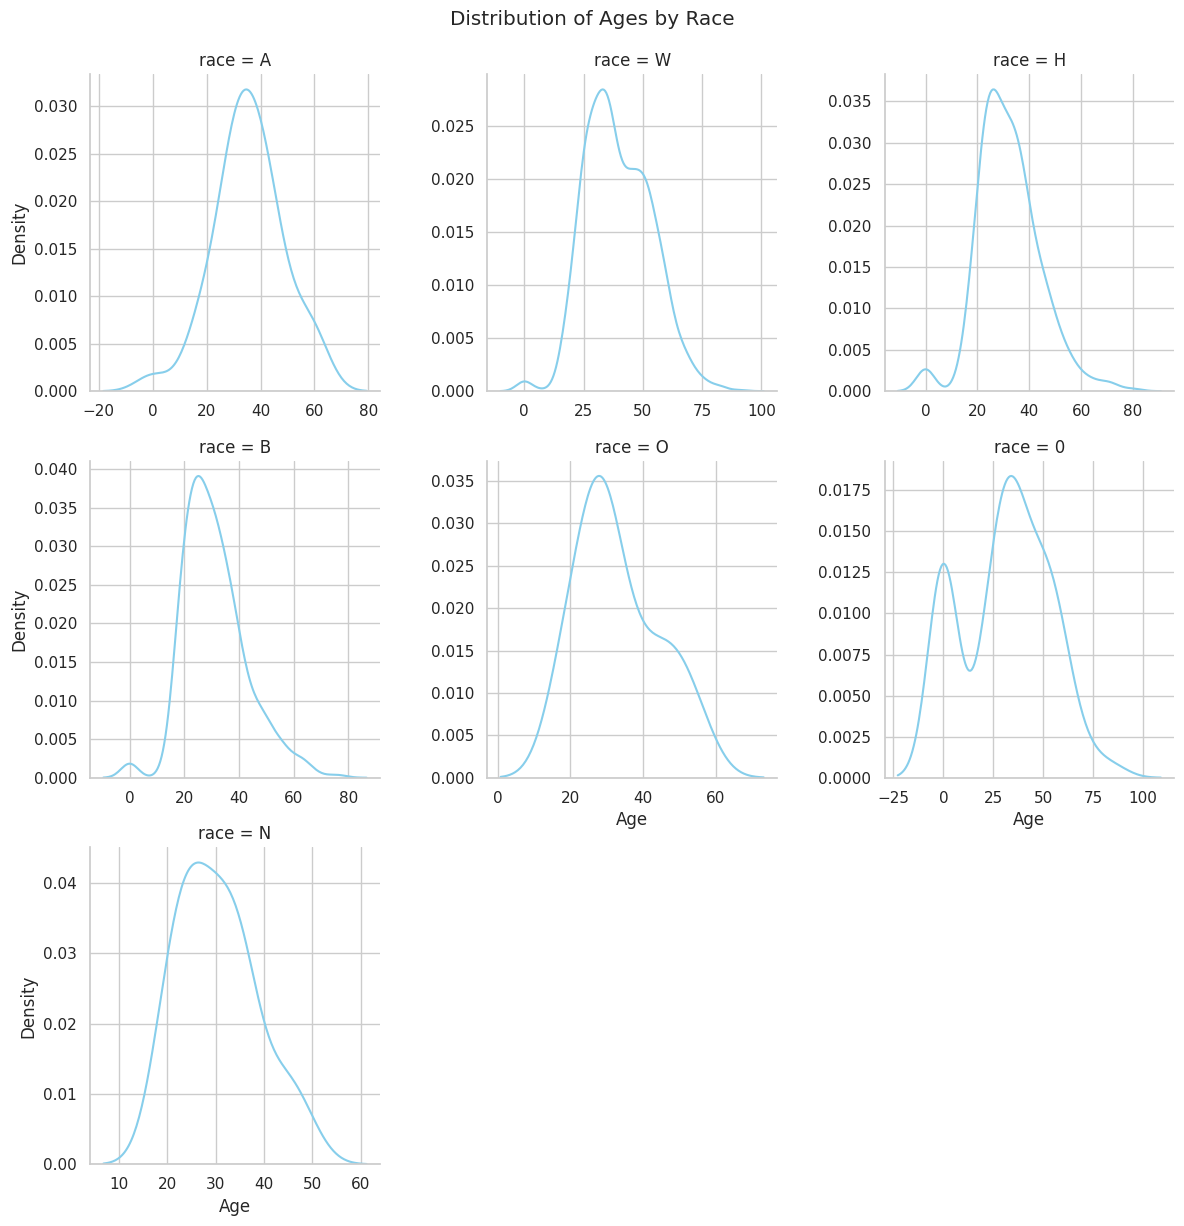

In [36]:
g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.kdeplot, 'age', color='skyblue')

# Set labels and title
g.set_axis_labels("Age", "Density")
g.fig.suptitle("Distribution of Ages by Race", y=1.02)

# Show the plot
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [37]:
race_counts = df_fatalities['race'].value_counts()

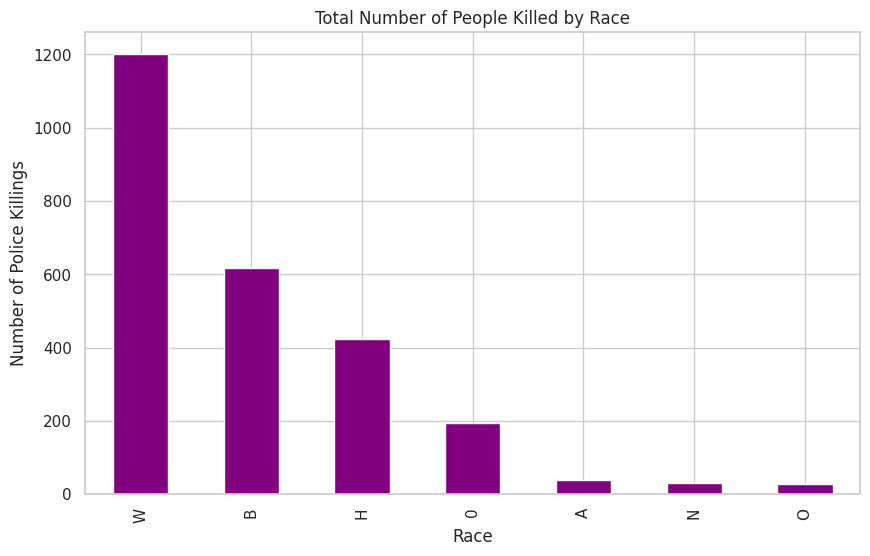

In [38]:
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='purple')

# Set labels and title
plt.xlabel('Race')
plt.ylabel('Number of Police Killings')
plt.title('Total Number of People Killed by Race')

# Show the plot
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [39]:
mental_illness_percentage = (df_fatalities['signs_of_mental_illness'] == True).sum() / len(df_fatalities) * 100

In [40]:
print(f"Percentage of people killed with a documented mental illness: {mental_illness_percentage:.2f}%")

Percentage of people killed with a documented mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [41]:
# Calculate the total number of police killings in each city
city_killings = df_fatalities['city'].value_counts()

# Select the top 10 cities
top_10_cities = city_killings.head(10)

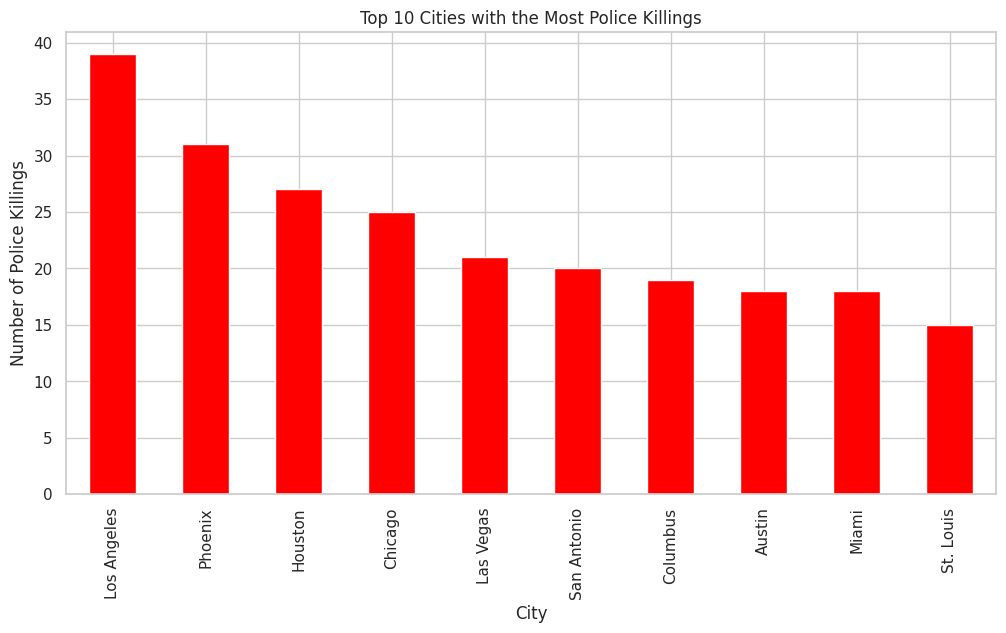

In [42]:
# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar', color='red')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Number of Police Killings')
plt.title('Top 10 Cities with the Most Police Killings')

# Show the plot
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [43]:
# Select the top 10 cities with the most police killings
top_10_cities = df_fatalities['city'].value_counts().head(10).index

# Filter the data for the top 10 cities
df_top_10_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

# Calculate the share of each race in the top 10 cities
race_share_top_10_cities = df_top_10_cities['race'].value_counts(normalize=True)

# Calculate the overall share of each race in the entire dataset
race_share_total = df_fatalities['race'].value_counts(normalize=True)

# Display the results
print("Share of each race in the top 10 cities:")
print(race_share_top_10_cities)

print("\nOverall share of each race in the entire dataset:")
print(race_share_total)

Share of each race in the top 10 cities:
B   0.37
H   0.27
W   0.26
0   0.07
N   0.02
A   0.01
O   0.00
Name: race, dtype: float64

Overall share of each race in the entire dataset:
W   0.47
B   0.24
H   0.17
0   0.08
A   0.02
N   0.01
O   0.01
Name: race, dtype: float64


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [44]:
# Calculate the total number of police killings by state
state_killings = df_fatalities['state'].value_counts()

# Create a DataFrame with state-level data
df_state_killings = pd.DataFrame({'state': state_killings.index, 'killings': state_killings.values})

In [45]:
# Create a choropleth map
fig = px.choropleth(df_state_killings,
                    locations='state',
                    locationmode='USA-states',
                    color='killings',
                    scope='usa',
                    color_continuous_scale='Reds',
                    title='Police Killings by US State')

# Show the map
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [46]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Extract year and month from the 'date' column
df_fatalities['year'] = df_fatalities['date'].dt.year

# Count the number of police killings per year
killings_per_year = df_fatalities['year'].value_counts().sort_index()

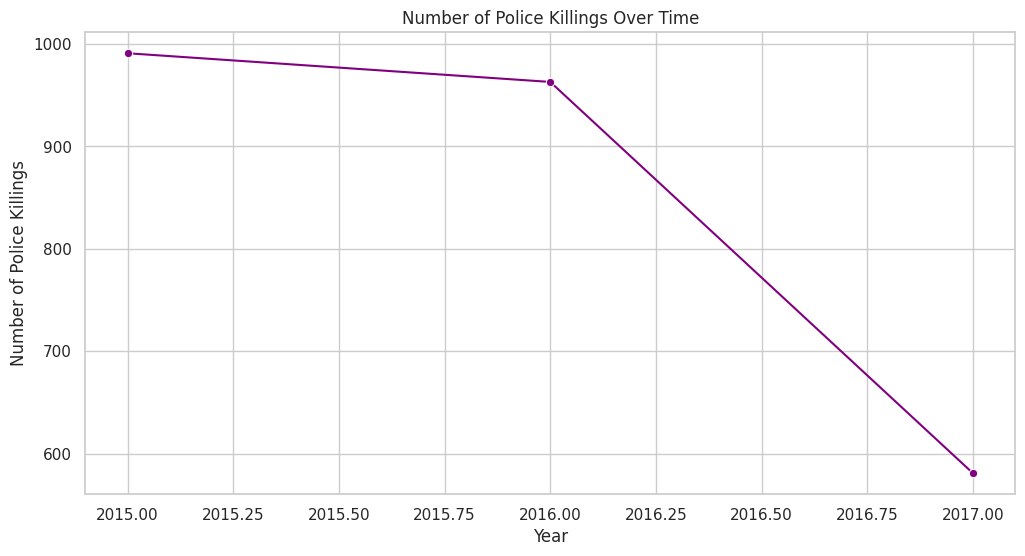

In [47]:
# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=killings_per_year.index, y=killings_per_year.values, marker='o', color='purple')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Police Killings')
plt.title('Number of Police Killings Over Time')

# Show the plot
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).